# Import libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline  

# Read books data

In [132]:
book = pd.read_csv(r"C:\Users\sad57\Desktop\The journey\Data_Sets\EDA\Books_Data_Clean.csv", index_col='index')
book.head()

,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
index,,,,,,,,,,,,,,
0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


# overview data

In [123]:
book.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 0 to 1069
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Publishing Year      1069 non-null   float64
 1   Book Name            1047 non-null   object 
 2   Author               1070 non-null   object 
 3   language_code        1017 non-null   object 
 4   Author_Rating        1070 non-null   object 
 5   Book_average_rating  1070 non-null   float64
 6   Book_ratings_count   1070 non-null   int64  
 7   genre                1070 non-null   object 
 8   gross sales          1070 non-null   float64
 9   publisher revenue    1070 non-null   float64
 10  sale price           1070 non-null   float64
 11  sales rank           1070 non-null   int64  
 12  Publisher            1070 non-null   object 
 13  units sold           1070 non-null   int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 125.4+ KB


In [128]:
book.describe()

,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,1994.730426,4.012230,94817.793855,1832.644985,841.360638,4.844311,613.314172,9744.482656
std,23.204719,0.246492,31473.890412,3947.885096,2279.579848,3.561712,369.628663,15350.021050
min,1901.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,1989.000000,3.860000,70701.000000,366.300000,0.000000,1.990000,291.000000,570.000000
50%,2003.000000,4.030000,89204.000000,792.000000,273.240000,3.990000,596.000000,3942.000000
75%,2010.000000,4.180000,113400.000000,1470.260000,714.756000,6.990000,933.000000,5427.000000
max,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [137]:
# # Keep only books published in or after the year 1900
book = book[book['Publishing Year'] >= 1900].sort_values(by= 'Publishing Year', ascending=False)

In [141]:
book['Publishing Year'].value_counts()

Publishing Year
2012.0    68
2011.0    55
2009.0    46
2010.0    44
2006.0    41
          ..
1926.0     1
1915.0     1
1911.0     1
1912.0     1
1901.0     1
Name: count, Length: 101, dtype: int64

# Check missing values 

In [142]:
book.isna().sum()

Publishing Year         0
Book Name              21
Author                  0
language_code          49
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

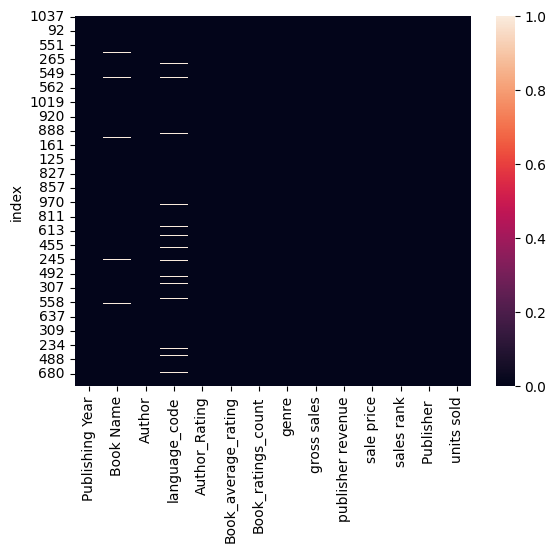

In [144]:
sns.heatmap(book.isna())
plt.show()

# Hadiling missing data and clean it

In [152]:
# Convert to datetime and extract only the year part
book['Publishing Year'] = pd.to_datetime(book['Publishing Year'], format='%Y', errors='coerce').dt.year


In [153]:
book.head()

,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
index,,,,,,,,,,,,,,
1037,2016,It Ends with Us,Colleen Hoover,eng,Famous,4.44,80433,fiction,747.93,448.758,6.99,1223,Penguin Group (USA) LLC,107
902,2016,The Woman in Cabin 10,Ruth Ware,eng,Intermediate,3.67,90541,nonfiction,109.89,65.934,0.99,1058,"Amazon Digital Services, Inc.",4400
993,2016,Hillbilly Elegy. A Memoir of a Family and Cult...,J.D. Vance,eng,Intermediate,3.99,80737,genre fiction,430.92,0.000,3.99,1169,"Amazon Digital Services, Inc.",108
321,2016,When Breath Becomes Air,"Paul Kalanithi, Abraham Verghese",eng,Excellent,4.32,116771,genre fiction,1041.39,0.000,3.99,343,"Amazon Digital Services, Inc.",261
968,2016,NaN,Jodi Picoult,eng,Excellent,4.35,73745,genre fiction,1306.91,784.146,11.99,1144,Penguin Group (USA) LLC,4240


In [154]:
# Handel nan book_name column 
book['Book Name']= book['Book Name'].fillna('Unknown') 

In [155]:
# Handel nan language_code 
book['language_code']= book['language_code'].fillna('Unknown')

In [ ]:
book['Decade'] = (book['Publishing Year'] // 10) * 10

# EDA on data

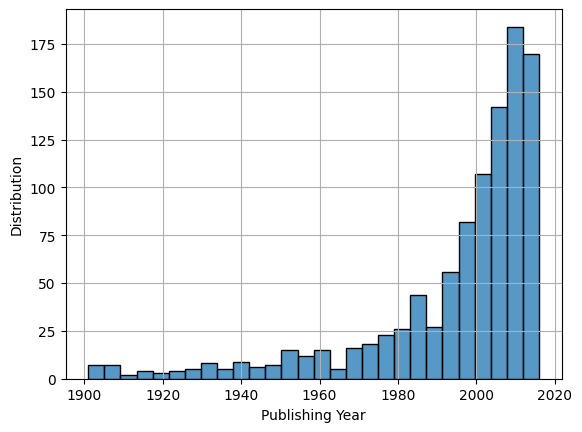

In [164]:
# Distribution Year 
sns.histplot(book, x= 'Publishing Year')
plt.ylabel('Distribution')
plt.grid(True)
plt.show()

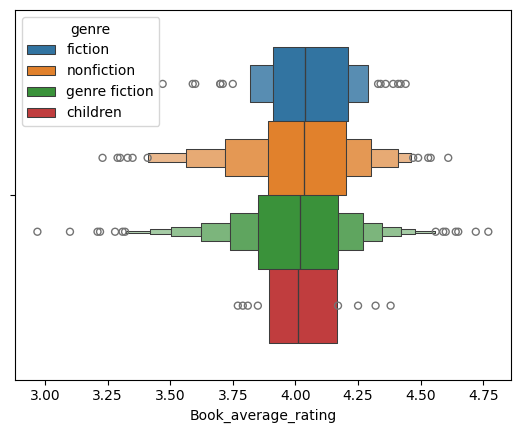

In [168]:
# Visualize the distribution of average ratings across genres using a boxplot
sns.boxenplot(book, x='Book_average_rating', hue='genre')
plt.show()

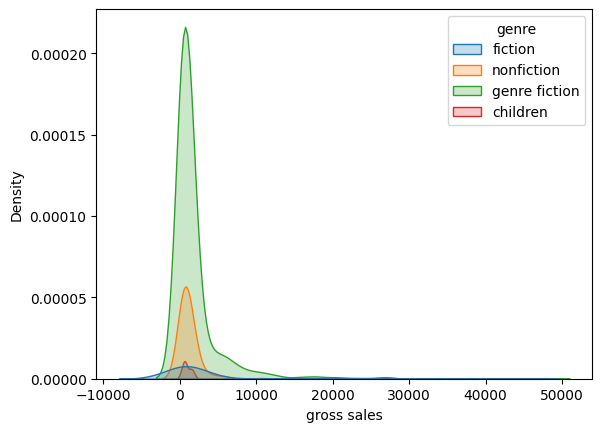

In [172]:
sns.kdeplot(book, x='gross sales', hue='genre', fill=True)
plt.show()

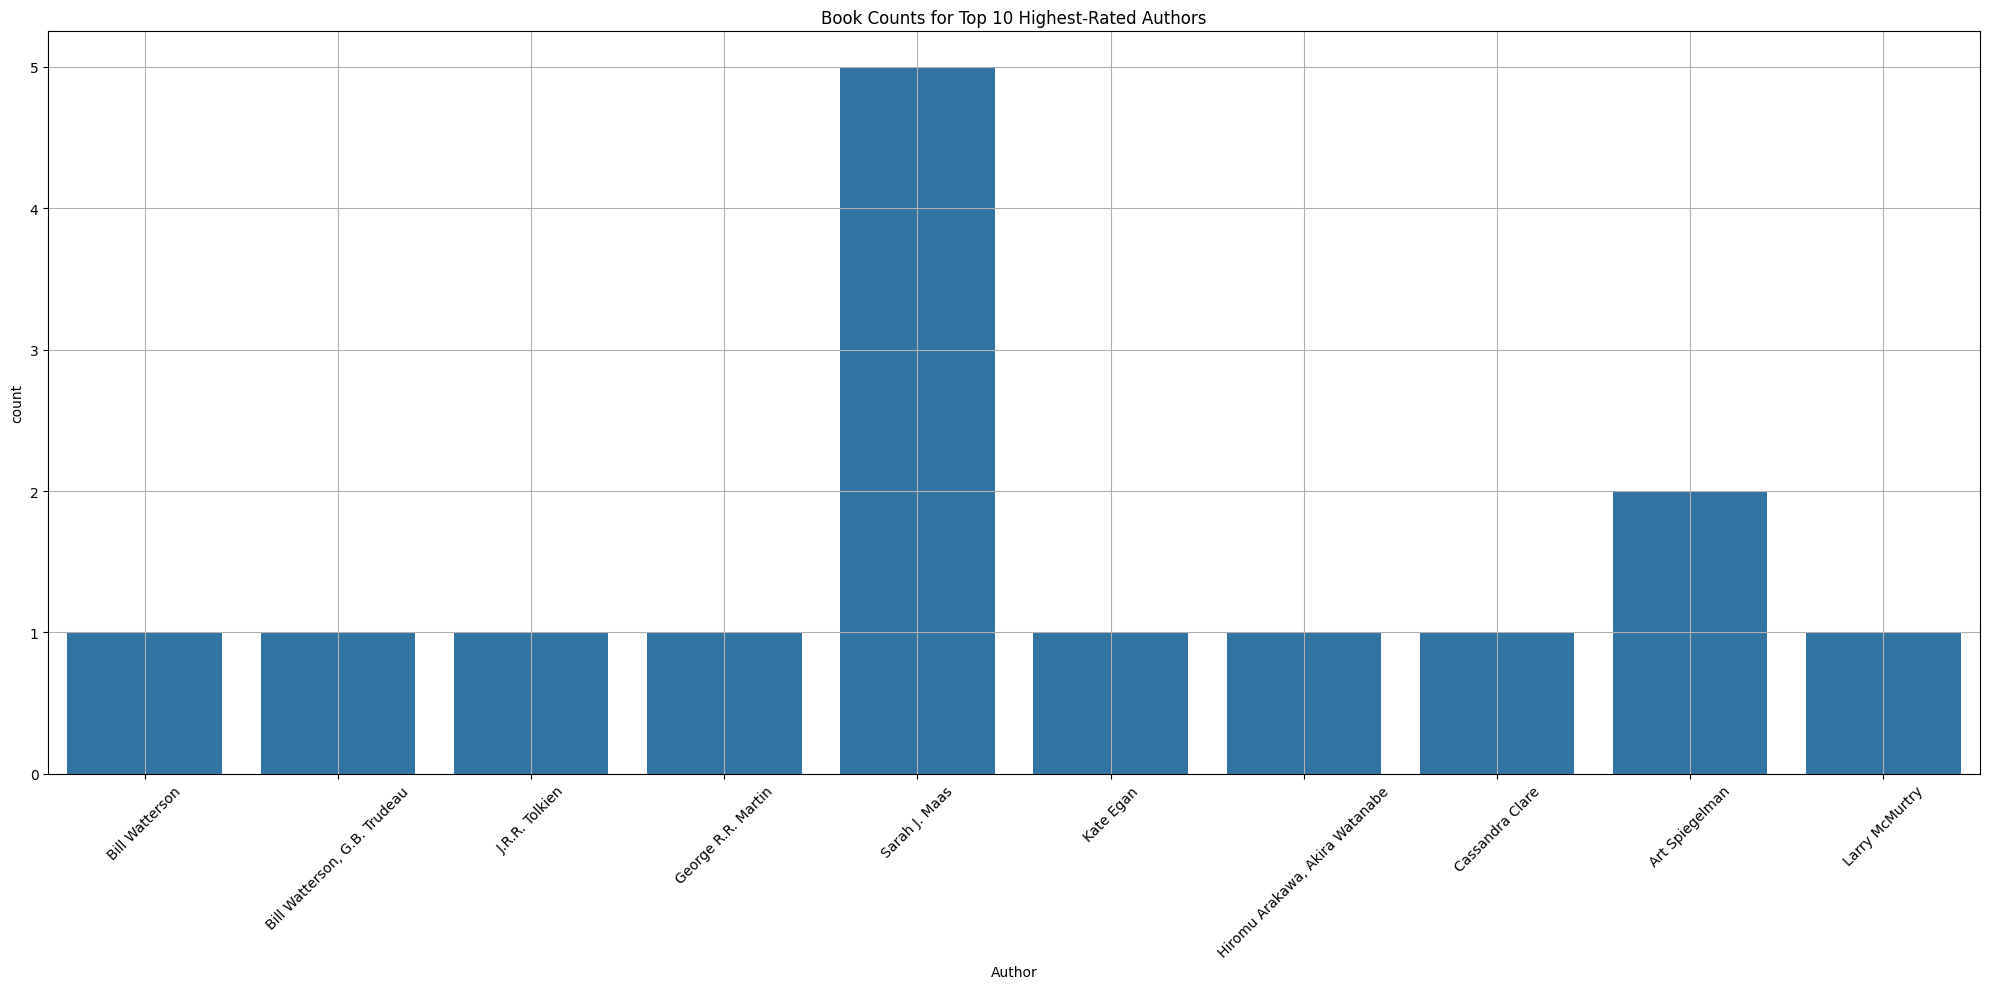

In [192]:
# Book Counts for Top 10 Highest-Rated Authors
top_authors = avg_author.sort_values(ascending=False).head(10).index
top_books = book[book['Author'].isin(top_authors)]
plt.figure(figsize=(20, 10))
sns.countplot(data=top_books, x='Author', order=top_authors)
plt.xticks(rotation=45)
plt.title('Book Counts for Top 10 Highest-Rated Authors')
plt.tight_layout()
plt.grid(True)
plt.show()


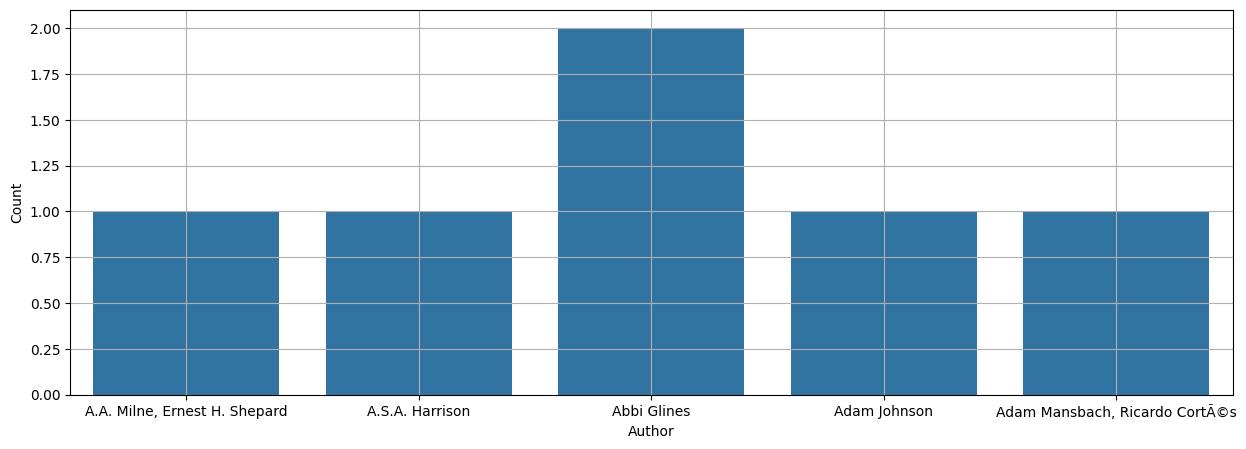

In [208]:
# Authors have published the most books?
plt.figure(figsize=(15, 5))
max_books= book.groupby('Author')['Book Name'].count()[0 :5]
sns.barplot(max_books)
plt.ylabel('Count')
plt.grid(True)
plt.show()


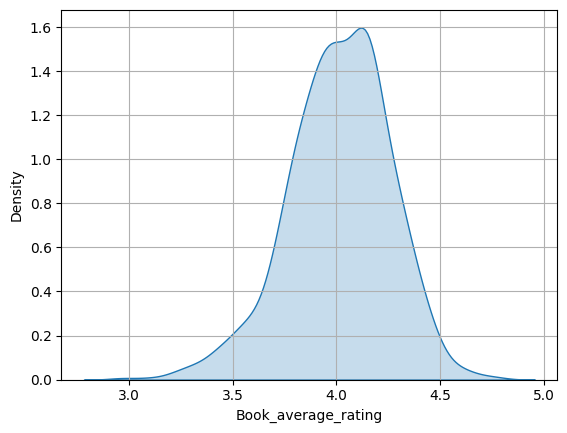

In [224]:
sns.kdeplot(book, x= 'Book_average_rating', fill=True)
plt.grid(True)
plt.show()

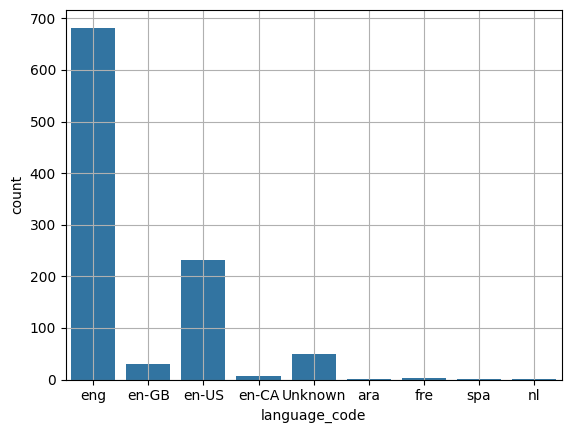

In [223]:
# most language_code used: 
sns.countplot(book, x='language_code')
plt.grid(True)
plt.show()

# Relationship & Pattern Discovery 

In [261]:
corr= book.corr(numeric_only=True)
corr

,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold,Decade
Publishing Year,1.000000,-0.042265,-0.086694,-0.047360,-0.047237,-0.002737,0.064922,0.027166,0.992601
Book_average_rating,-0.042265,1.000000,0.117761,-0.036861,-0.045883,-0.007354,-0.028519,-0.019400,-0.037791
Book_ratings_count,-0.086694,0.117761,1.000000,0.493851,0.401406,-0.065940,-0.830619,-0.251761,-0.080933
gross sales,-0.047360,-0.036861,0.493851,1.000000,0.922088,0.272027,-0.435264,-0.147371,-0.046706
publisher revenue,-0.047237,-0.045883,0.401406,0.922088,1.000000,0.310479,-0.339235,-0.113747,-0.048113
sale price,-0.002737,-0.007354,-0.065940,0.272027,0.310479,1.000000,0.068377,0.014058,-0.009653
sales rank,0.064922,-0.028519,-0.830619,-0.435264,-0.339235,0.068377,1.000000,0.212684,0.065964
units sold,0.027166,-0.019400,-0.251761,-0.147371,-0.113747,0.014058,0.212684,1.000000,0.034493
Decade,0.992601,-0.037791,-0.080933,-0.046706,-0.048113,-0.009653,0.065964,0.034493,1.000000


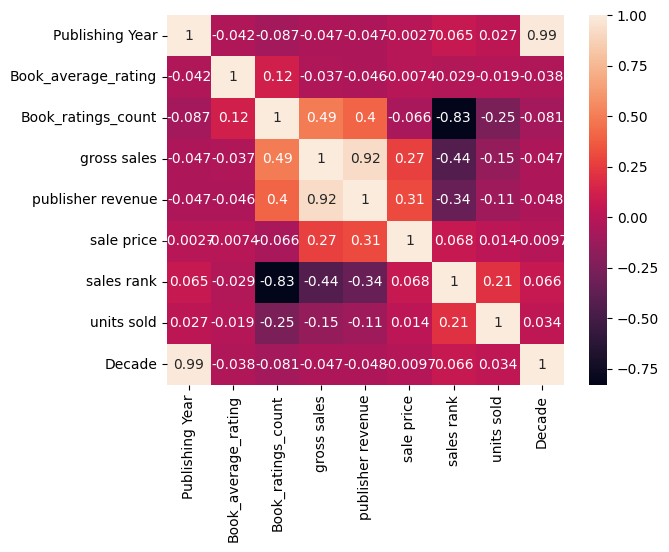

In [263]:
sns.heatmap(corr, annot=True)
plt.show()

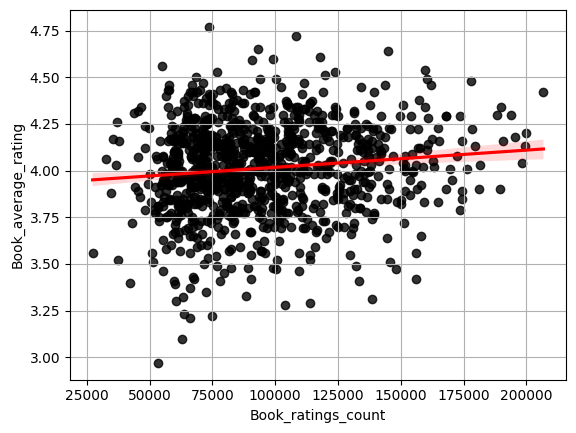

In [235]:
# Is there a correlation between the number of ratings and average rating?
sns.regplot(book, x= 'Book_ratings_count', y='Book_average_rating', scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
plt.grid(True)
plt.show()

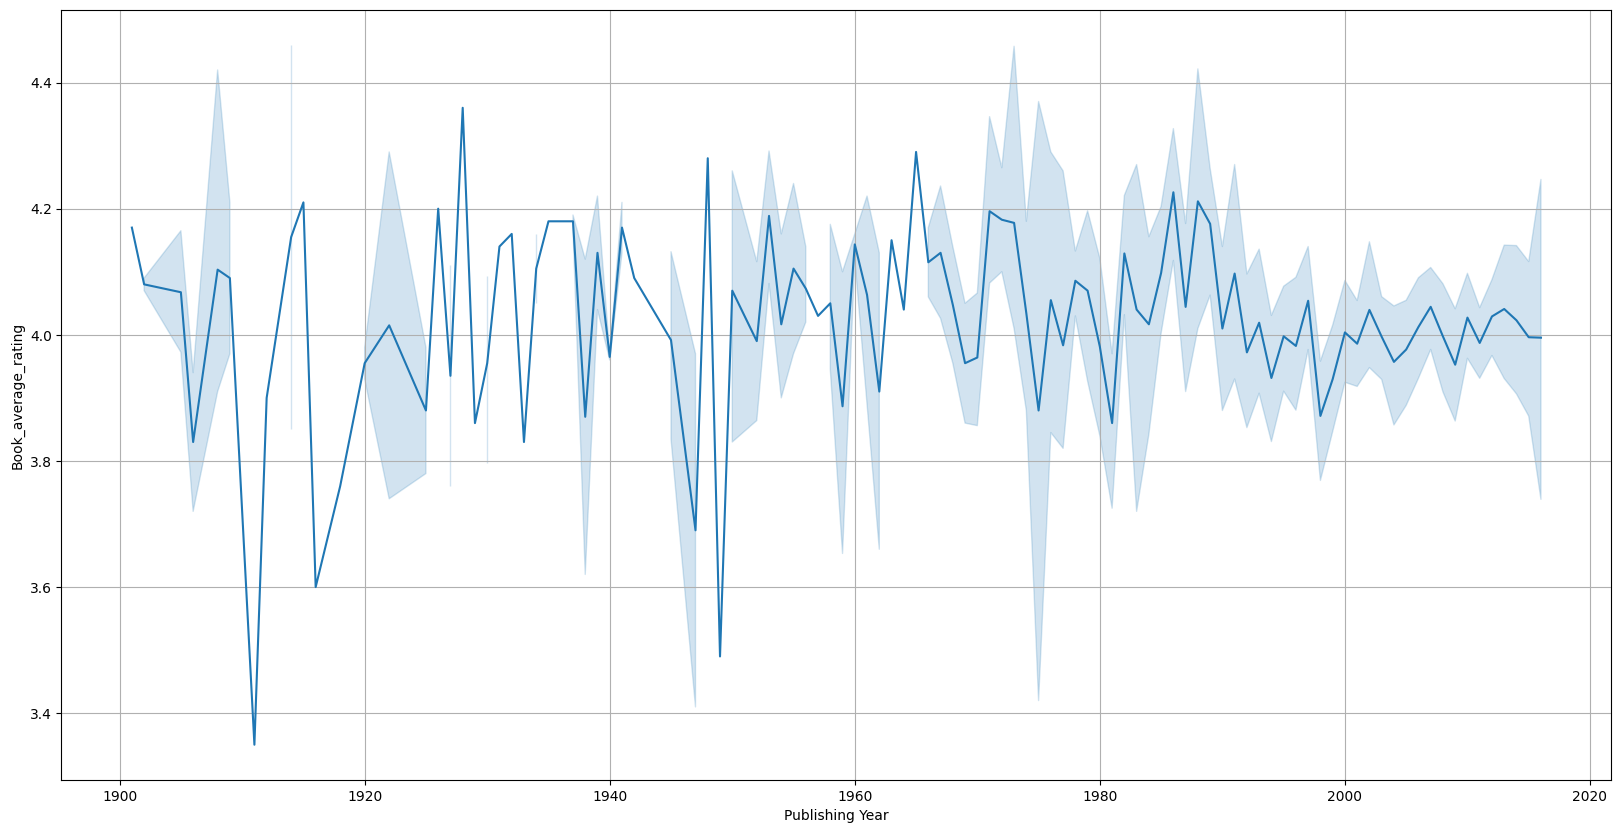

In [245]:
# Avg book ratings for years
plt.figure(figsize=(20, 10))
sns.lineplot(book, x= 'Publishing Year', y='Book_average_rating')
plt.grid(True)
plt.show()

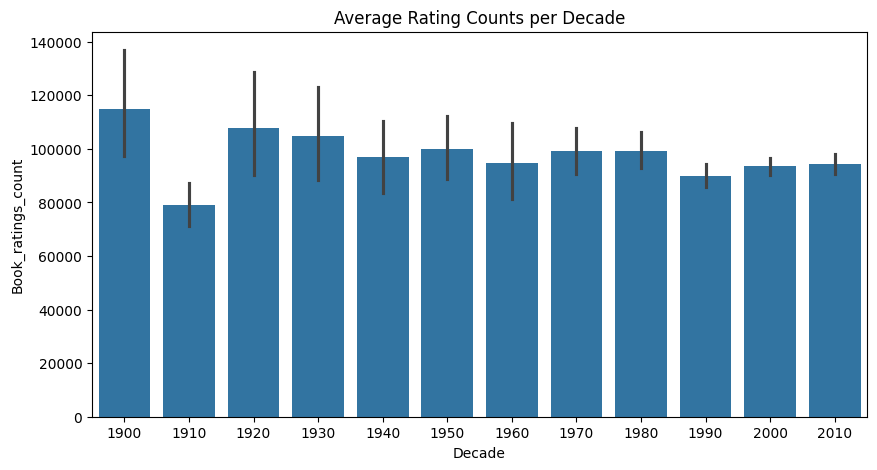

In [264]:
# How do rating counts vary across decades
plt.figure(figsize=(10, 5))
sns.barplot(data=book, x='Decade', y='Book_ratings_count', estimator='mean')
plt.title('Average Rating Counts per Decade')
plt.show()